In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Datos

Este dataset muestra las películas y series de Netflix, mostrando su título, director, cast, país y fecha de estreno. Así como su rating y duración.

In [3]:
data = pd.read_csv('/content/sample_data/netflix_dataset.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Revisamos la información de las variables y su tipo.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Verificamos si existen valores nulos en los datos.

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Preguntas a resolver

### ¿Cuántas películas y series posee Netflix?

In [6]:
total_prod = data['type'].value_counts()

<ipython-input-7-bc1b372758c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['type'], data = data, palette = 'summer')


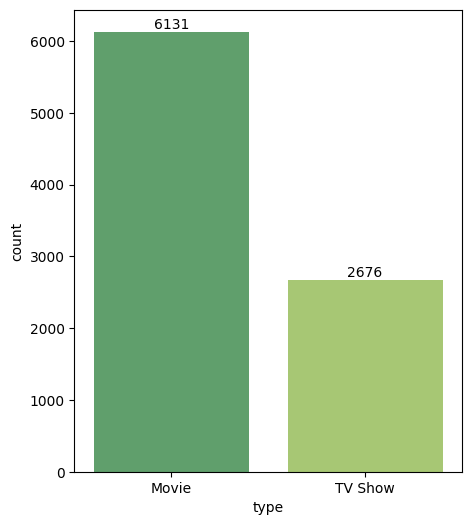

In [7]:
plt.figure(figsize = (5, 6))

sns.countplot(x = data['type'], data = data, palette = 'summer')

for i, count in enumerate(total_prod):
  plt.text(i, count, str(count), ha = 'center', va = 'bottom')

plt.show()

Existen 6131 películas y 2676 series.

### ¿Qué clasificación posee más producciones?

<ipython-input-8-38a2508d6f17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['rating'], data = data, palette = 'mako', order = order)


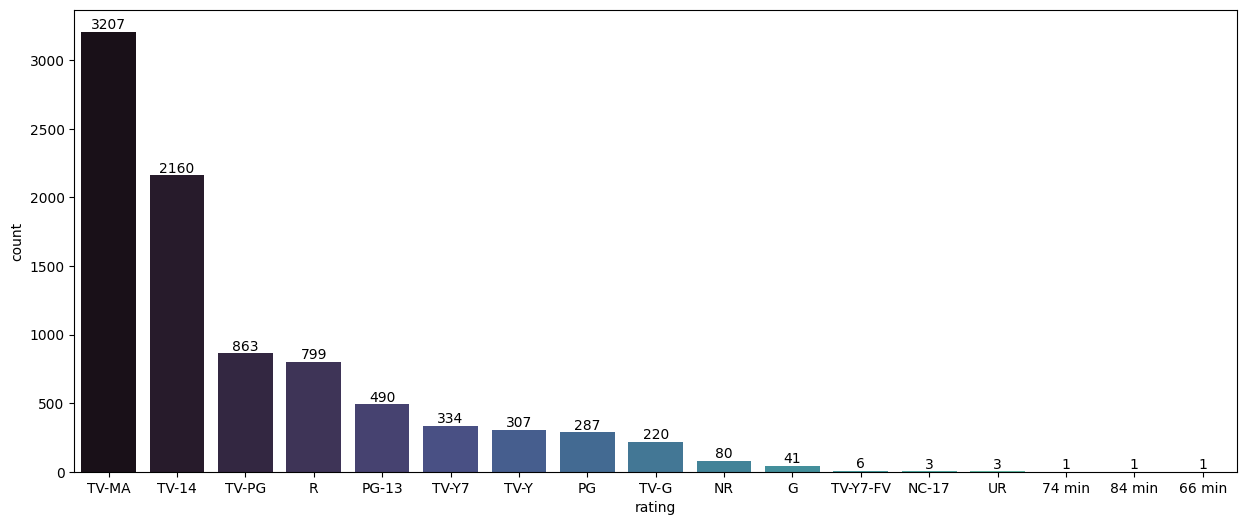

In [8]:
plt.figure(figsize = (15, 6))

count_data = data['rating'].value_counts()
order = count_data.sort_values(ascending = False).index #El orden será de forma descendente

sns.countplot(x = data['rating'], data = data, palette = 'mako', order = order)

for i, count in enumerate(count_data):
  plt.text(i, count, str(count), ha = 'center', va = 'bottom')

plt.show()

La clasificación "TV-MA", siendo el público maduro, es la que posee más producciones, siendo 3207 en total.

### ¿Qué clasificación posee más películas y series?

<Axes: xlabel='rating', ylabel='count'>

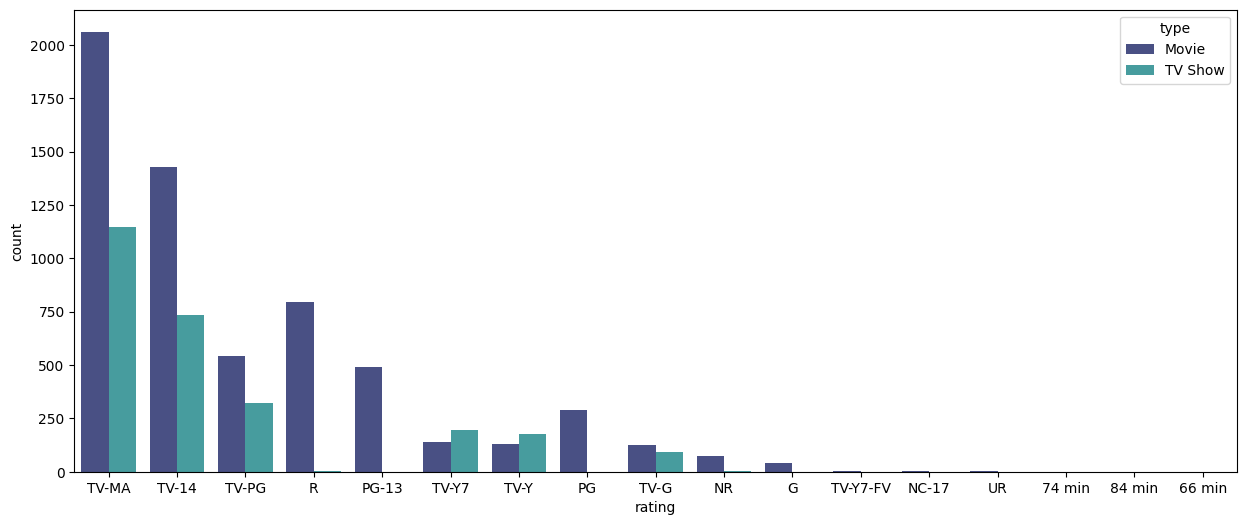

In [9]:
plt.figure(figsize = (15, 6))

sns.countplot(x = data['rating'], data = data, palette = 'mako', hue = data['type'], order = order)

La clasificación "TV-MA", siendo el público maduro, es la que posee más películas y series.

## Películas

In [10]:
data_movie = data[data['type'] == 'Movie']

### ¿Qué directores producieron más películas?

Revisamos la información de la columna Director

In [11]:
data_director = data_movie['director'].value_counts()
data_director

Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: director, Length: 4354, dtype: int64

Realizamos un Dataframe para ver los directores con la mayor cantidad de producción de películas

In [12]:
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,director
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14


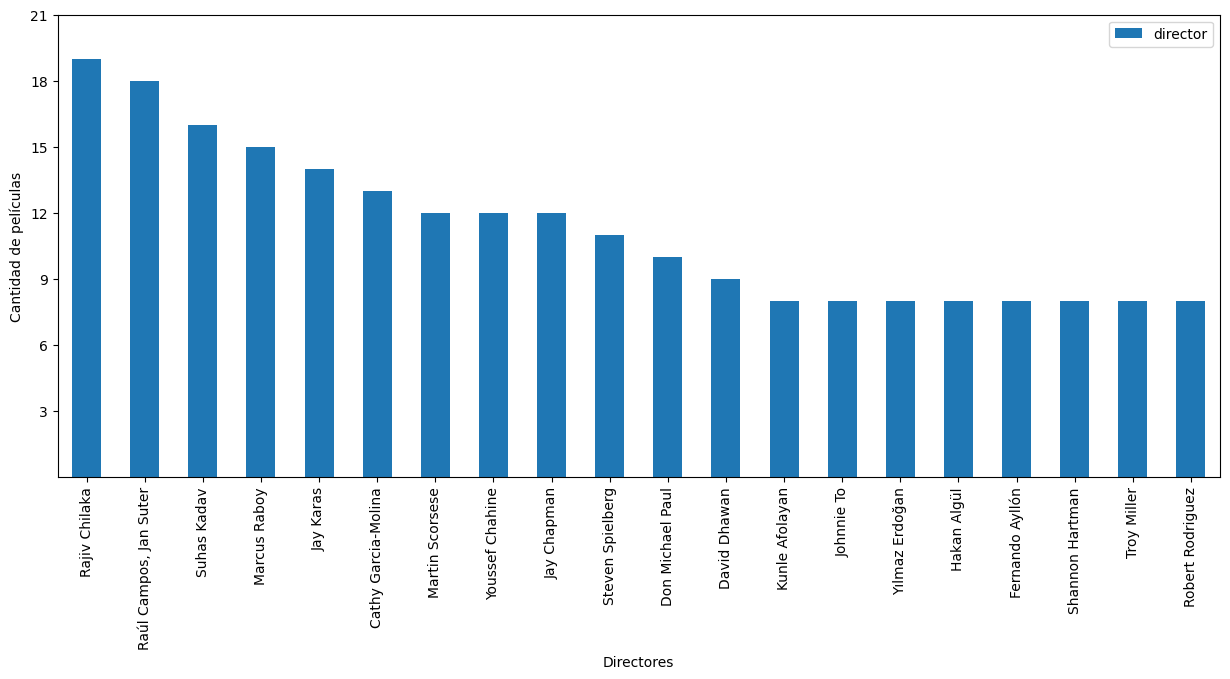

In [13]:
data_directorFrame[:20].plot(kind = 'bar', figsize = (15, 6))

plt.ylabel('Cantidad de películas')
plt.xlabel('Directores')
plt.yticks([3, 6, 9, 12, 15, 18, 21])

plt.show()

Encontramos que Rajiv Chilaka es el director que realizó más películas en Netflix.

### ¿Qué actores participaron en la mayor cantidad de películas?

In [14]:
data_movie_actor = data_movie.set_index('title').cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
data_movie_actor = pd.DataFrame(data_movie_actor)
data_movie_actor.head()

,0
title,
My Little Pony: A New Generation,Vanessa Hudgens
My Little Pony: A New Generation,Kimiko Glenn
My Little Pony: A New Generation,James Marsden
My Little Pony: A New Generation,Sofia Carson
My Little Pony: A New Generation,Liza Koshy


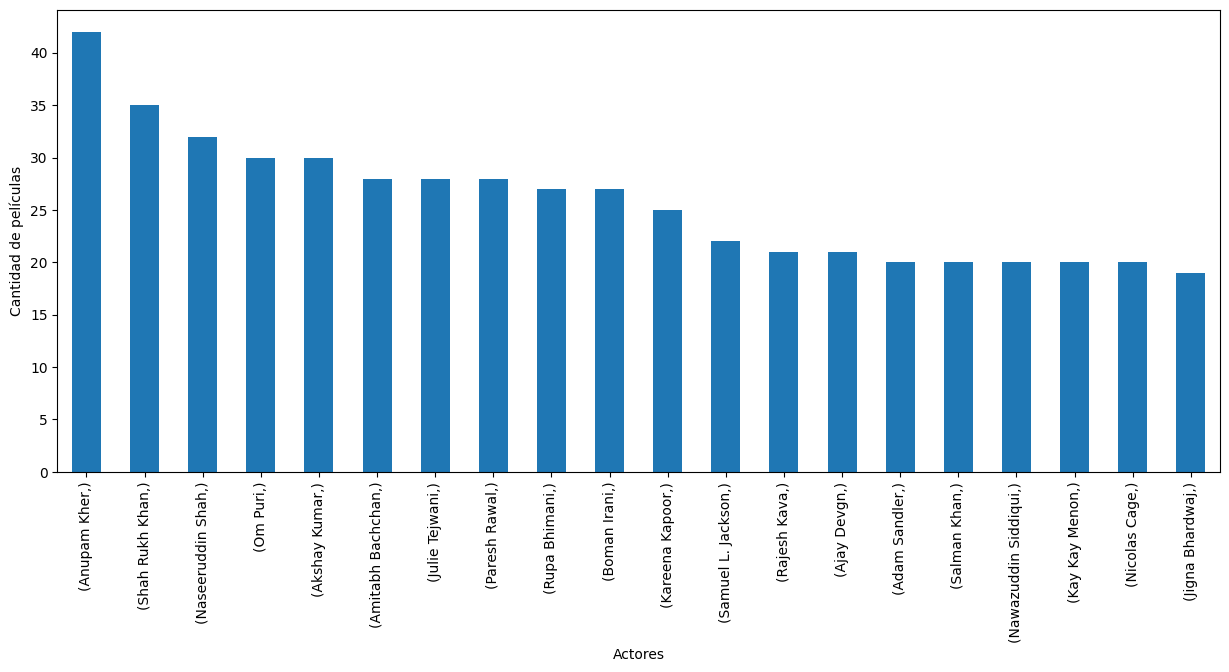

In [15]:
top_actors_movie = data_movie_actor.value_counts()

top_actors_movie[:20].plot(kind = 'bar', figsize = (15, 6))

plt.ylabel('Cantidad de películas')
plt.xlabel('Actores')

plt.show()

Anupam Kher es el actor que ha participado en más películas de Netflix.

### Top géneros por películas

In [16]:
data_movie_list_in = data_movie.set_index('title').listed_in.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
data_movie_list_in

title
Dick Johnson Is Dead                           Documentaries
My Little Pony: A New Generation    Children & Family Movies
Sankofa                                               Dramas
Sankofa                                   Independent Movies
Sankofa                                 International Movies
                                              ...           
Zoom                                Children & Family Movies
Zoom                                                Comedies
Zubaan                                                Dramas
Zubaan                                  International Movies
Zubaan                                      Music & Musicals
Length: 13190, dtype: object

In [17]:
top_list_in = data_movie_list_in.value_counts()
top_list_in

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
dtype: int64

<ipython-input-18-80fca7136ce3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = data_movie_list_in, order = data_movie_list_in.value_counts().index[:20], palette = 'rainbow')


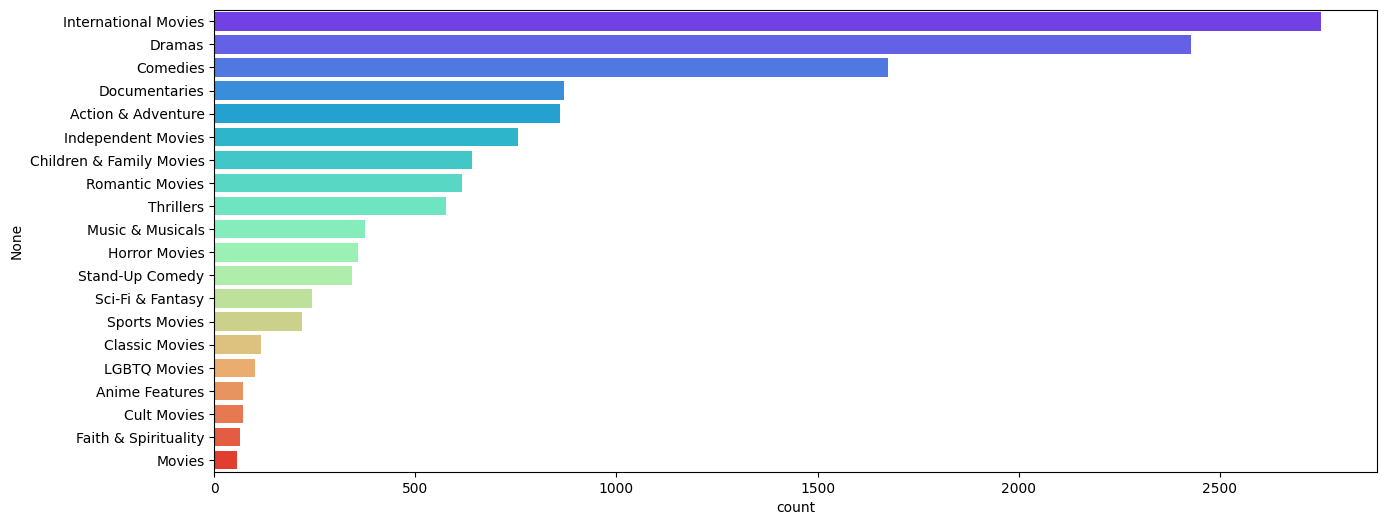

In [18]:
plt.figure(figsize = (15, 6))

sns.countplot(y = data_movie_list_in, order = data_movie_list_in.value_counts().index[:20], palette = 'rainbow')

plt.show()

Las películas que entran en los primeros top 3 son Películas Internacionales, siendo el primero. Luego, sigue Dramas, siendo el segundo y, por último, Comedias, siendo el tercero en el top.

### Año de cada Producción (Peliculas)

<ipython-input-19-60f1e2c2b70b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data_movie['release_year'], data = data_movie, palette = 'coolwarm')


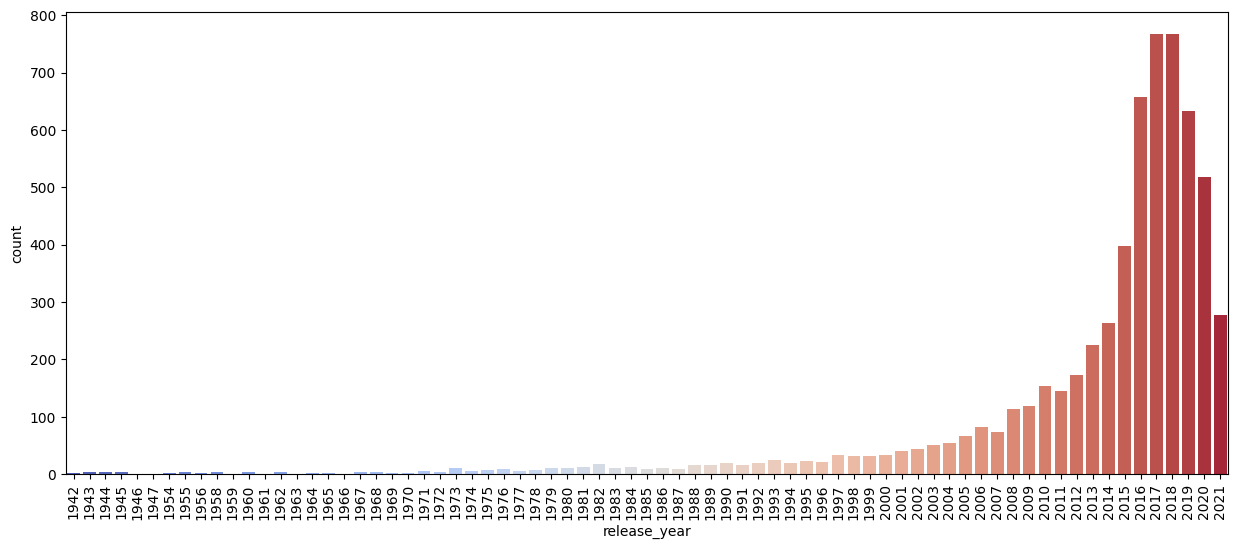

In [19]:
plt.figure(figsize = (15, 6))

sns.countplot(x = data_movie['release_year'], data = data_movie, palette = 'coolwarm')

plt.xticks(rotation = 90)
plt.show()

Según la gráfica, 2017 y 2018 son los años en los que han producido más películas.

### Países en donde se producen más películas

<ipython-input-20-83c2c1ff87ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y = 'country', data = data_movie, order = data_movie['country'].value_counts().index[:10], palette = 'plasma')


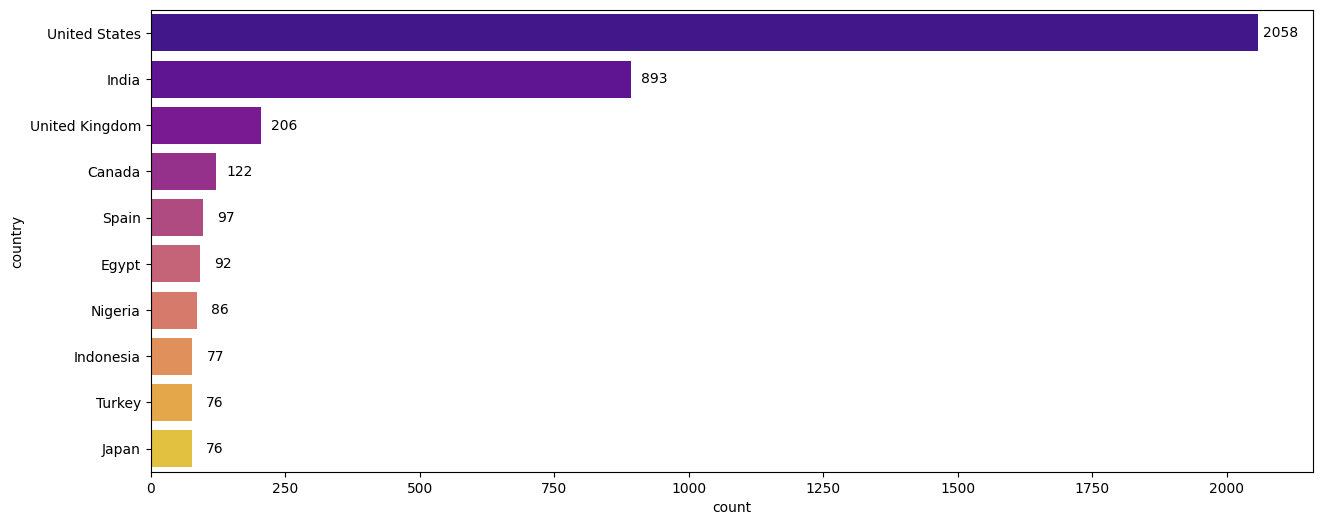

In [20]:
plt.figure(figsize = (15, 6))

ax = sns.countplot(y = 'country', data = data_movie, order = data_movie['country'].value_counts().index[:10], palette = 'plasma')

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 30, p.get_y() + p.get_height() / 2),
            ha = "center", va = "center", xytext = (5, 0), textcoords = 'offset points')

plt.show()

Como observamos en el gráfico, Estados Unidos es el país que ha producido más películas, con un total de 2058.

## Series

In [21]:
data_tv = data[data['type'] == 'TV Show']

### ¿Qué directores producieron más series?

In [22]:
data_director = data_tv['director'].value_counts()
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,director
Alastair Fothergill,3
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2


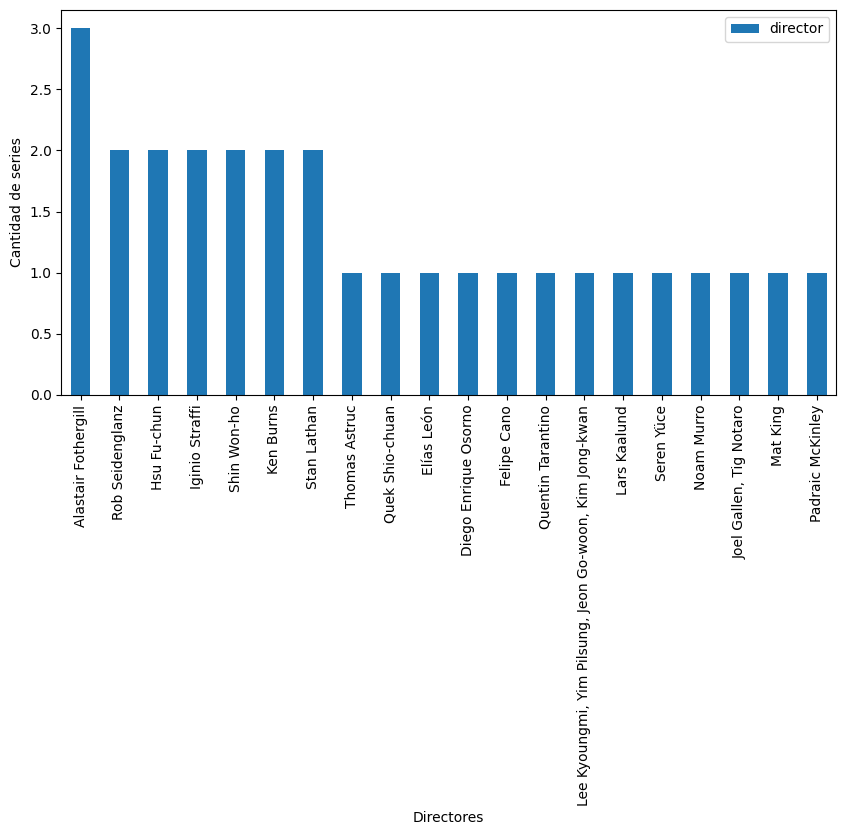

In [23]:
data_directorFrame[:20].plot(kind = 'bar', figsize = [10, 5])
plt.ylabel('Cantidad de series')
plt.xlabel('Directores')
plt.show()

Alastair Fothergill es el director que más series ha producido en Netflix.

### ¿Qué actores participaron en la mayor cantidad de series?

In [24]:
data_tv_actor = data_tv.set_index('title').cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
data_tv_actor = pd.DataFrame(data_tv_actor)
data_tv_actor.head()

,0
title,
Blood & Water,Ama Qamata
Blood & Water,Khosi Ngema
Blood & Water,Gail Mabalane
Blood & Water,Thabang Molaba
Blood & Water,Dillon Windvogel


In [25]:
top_actors_tv = data_tv_actor.value_counts()
top_actors_tv

Takahiro Sakurai         25
Yuki Kaji                19
Junichi Suwabe           17
Daisuke Ono              17
Ai Kayano                17
                         ..
Ivy Yin                   1
Iván Pellicer             1
Iván Álvarez de Araya     1
Iza Moreira               1
Şükrü Özyıldız            1
Length: 14863, dtype: int64

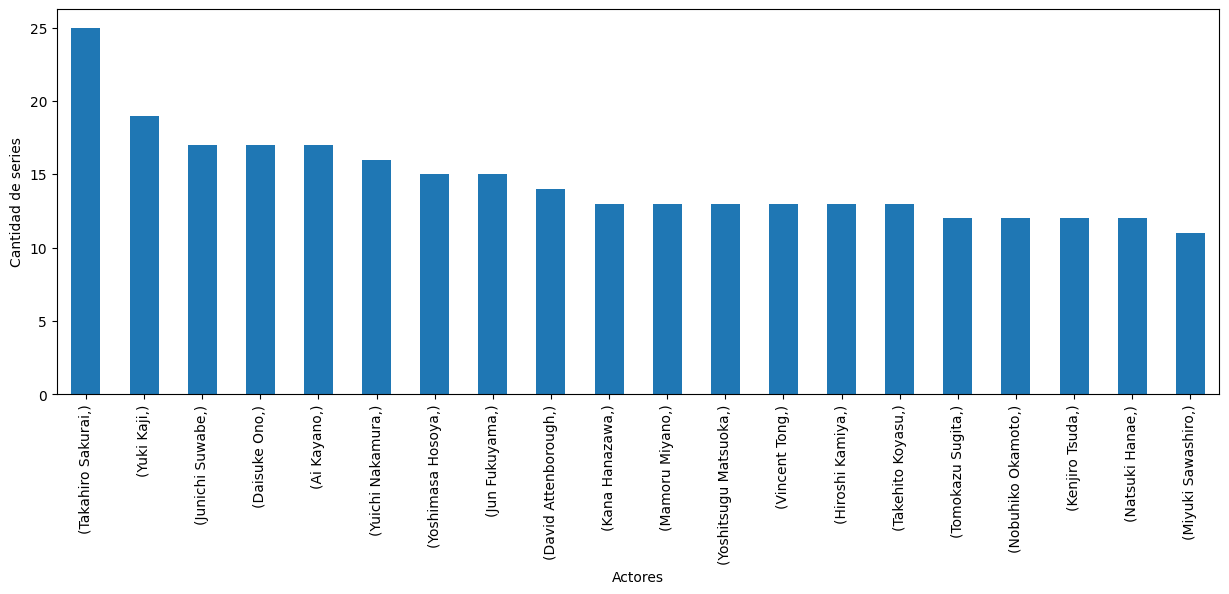

In [26]:
top_actors_tv[:20].plot(kind = 'bar', figsize = (15, 5))

plt.ylabel('Cantidad de series')
plt.xlabel('Actores')

plt.show()

Takahiro Sakurai es el actor que ha participado en más series en Netflix.

### Top géneros por series

In [49]:
data_tv_in = data_tv.set_index('title').listed_in.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
data_tv_in

title
Blood & Water         International TV Shows
Blood & Water                      TV Dramas
Blood & Water                   TV Mysteries
Ganglands                     Crime TV Shows
Ganglands             International TV Shows
                               ...          
Zindagi Gulzar Hai         Romantic TV Shows
Zindagi Gulzar Hai                 TV Dramas
Zombie Dumb                         Kids' TV
Zombie Dumb                  Korean TV Shows
Zombie Dumb                      TV Comedies
Length: 6133, dtype: object

In [51]:
top_list_tv_in = data_tv_in.value_counts()
top_list_tv_in

International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
dtype: int64

<ipython-input-55-a2101d1a3ff2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = data_tv_in, palette = 'rainbow')


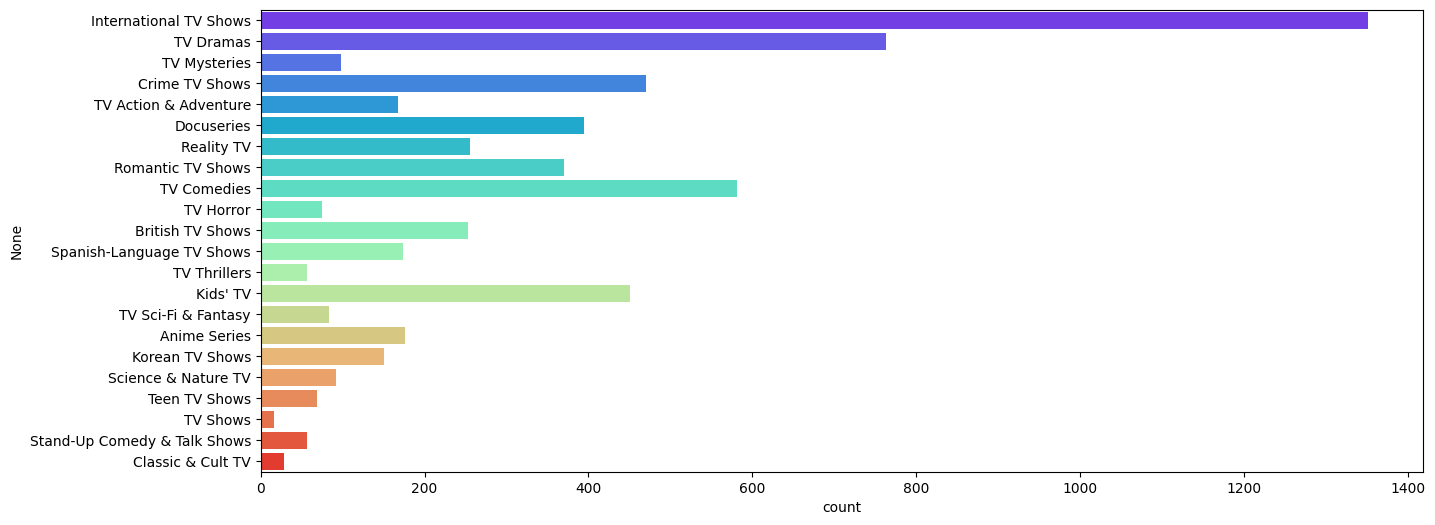

In [55]:
plt.figure(figsize = (15, 6))

sns.countplot(y = data_tv_in, palette = 'rainbow')

plt.show()

Los Shows de TV Internacionales son los que lideran el top, seguido de Dramas y luego Comedias.

### Año de cada Producción (Series)

<ipython-input-56-d7f468c32b71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data_tv['release_year'], data = data_tv, palette = 'coolwarm')


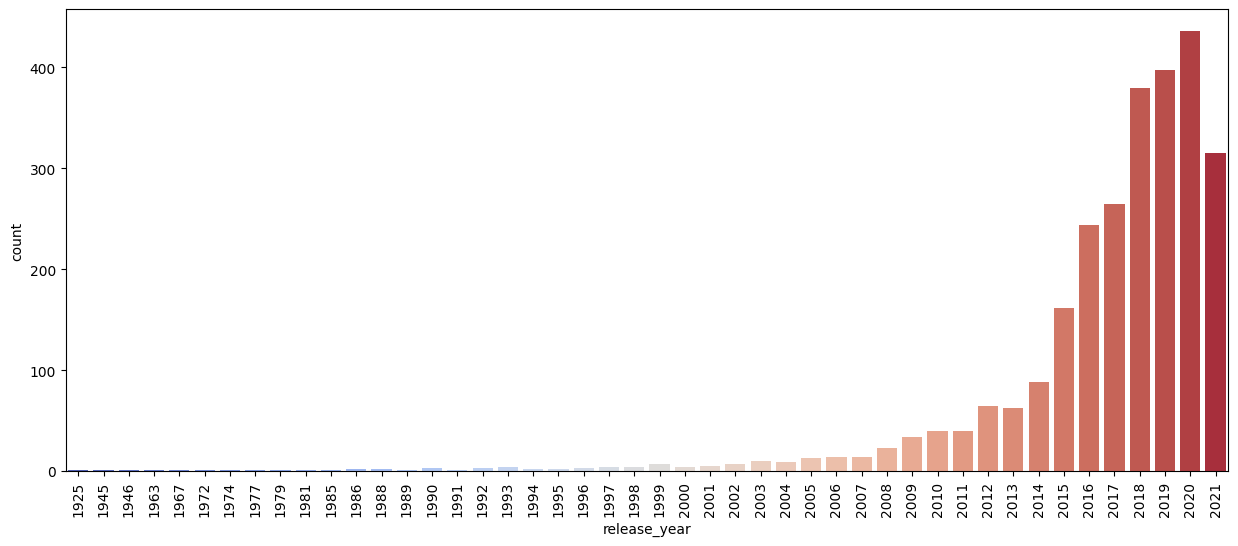

In [56]:
plt.figure(figsize = (15, 6))

sns.countplot(x = data_tv['release_year'], data = data_tv, palette = 'coolwarm')

plt.xticks(rotation = 90)
plt.show()

2020 es el año en el que más series se ha producido.

### Países en donde se producen más series

<ipython-input-61-7af7e240c171>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y = 'country', data = data_tv, order = data_tv['country'].value_counts().index[:10], palette = 'plasma')


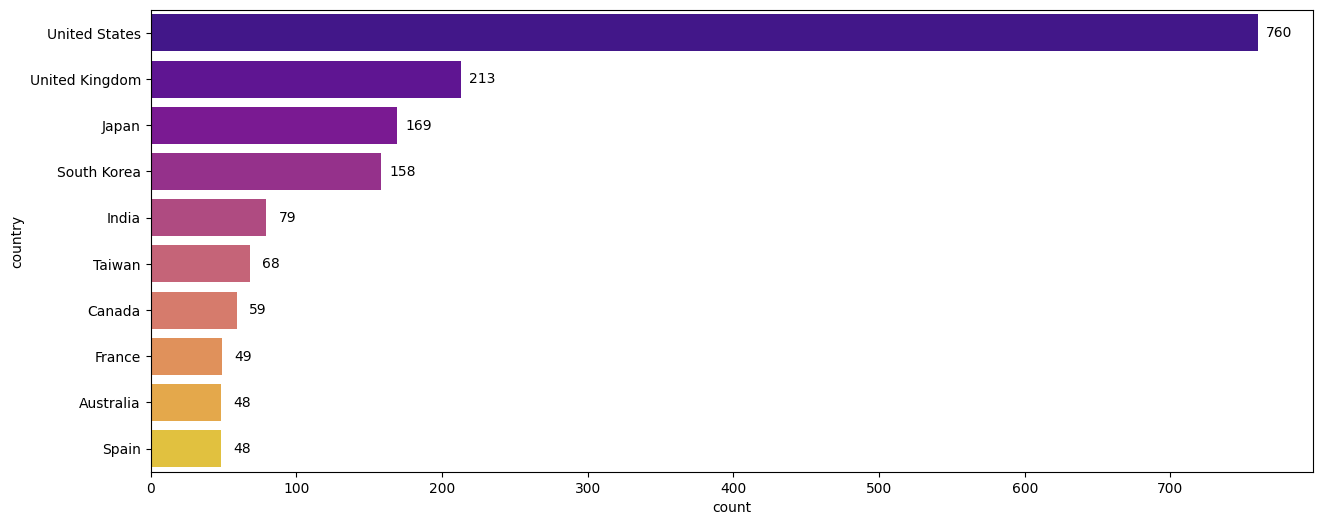

In [61]:
plt.figure(figsize = (15, 6))

ax = sns.countplot(y = 'country', data = data_tv, order = data_tv['country'].value_counts().index[:10], palette = 'plasma')

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 10, p.get_y() + p.get_height() / 2),
            ha = "center", va = "center", xytext = (5, 0), textcoords = 'offset points')

plt.show()

El país en el que se producen más series es Estados Unidos, con 760 series, seguido de Reino Unido, con 213, y Japón, con 169.